# Example Three: Diabetes Health Indicator

***In this example, I will be using classification to predict/indicate a patient's possible diabetes status.***

***First of all, here are the feature and target columns, and the value representing their meaning:***
> 1. Diabetes012: 0 = no diabetes 1 = prediabetes 2 = diabetes

>2. HighBP: 0 = no high BP 1 = high BP

>3. HighChol: 0 = no high cholesterol 1 = high cholesterol

>4. CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

>5. BMI: Body Mass Index

>6. Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes

>7. Stroke: (Ever told) you had a stroke. 0 = no 1 = yes

>8. HeartDeseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

>9. PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

>10. Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

>11. Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

>12. HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

>13. AnyHealthCare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

>14. NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

>15. GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

>16. MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

>17. PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

>18. DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

>19. Sex: 0 = female 1 = male

>20. Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

>21. Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

>22. Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10000 5 = less than 35000 8 = 75,000 or more

***One more thing to notice about the dataset that I will be using is that this dataset has an imbalance in the classification, so I will use over_sample SMOTE method to solve the imbalance and run through the models again afterwards.***

In [1]:
import pandas as pd
import numpy as np
import missingno
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Data Inspection

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

After checking the data, we found that there is no missing value in the data frame, and all columns' dtypes are float, which is very good. And now we move onto inspecting if there is an imbalance in the default categories of the columns.

Here I will only check the columns where the categories are including finite continuous data, such as the age and income columns.

In [5]:
df.Age.value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

As you can see here, there is a slight imbalance in the Age column, so I will later re-categorize this column into three categories: Young, Middle, Old.

In [6]:
df.GenHlth.value_counts()

2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: GenHlth, dtype: int64

Here I will combine the 4 & 5, namely fair and poor into not good.

In [7]:
df.MentHlth.value_counts()

0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: MentHlth, dtype: int64

Here I will put these into three categories as well, namely rarely, middle and frequent.

In [8]:
df.PhysHlth.value_counts()

0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: PhysHlth, dtype: int64

Same here, three categories: rarely, middle and frequent.

In [9]:
df.Education.value_counts()

6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64

Same here: low, middle, high.

In [10]:
df.Income.value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

Same here: low, middle, high.

### Data Preprocessing and Feature Engineering

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [12]:
# custom function for processing data
def cus_trans(df):
    df.loc[df.GenHlth > 3, 'GenHlth'] = 3
    df.loc[df.MentHlth <= 5, 'MentHlth'] = 0
    df.loc[(df.MentHlth > 5) & (df.MentHlth <=10), 'MentHlth'] = 1
    df.loc[df.MentHlth > 10, 'MentHlth'] = 2
    df.loc[df.PhysHlth <= 5, 'PhysHlth'] = 0
    df.loc[(df.PhysHlth > 5) & (df.PhysHlth <=10), 'PhysHlth'] = 1
    df.loc[df.PhysHlth > 10, 'PhysHlth'] = 2
    df.loc[df.Education <= 3, 'Education'] = 4
    df.loc[df.Income < 4, 'Income'] = 0
    df.loc[(df.Income >= 4) & (df.Income < 7), 'Income'] = 1
    df.loc[df.Income >= 7, 'Income'] = 2
    df.loc[df.Age < 6, 'Age'] = 0
    df.loc[(df.Age >= 6) & (df.Age < 10), 'Age'] = 1
    df.loc[df.Age >= 10, 'Age'] = 2
    return df

In [13]:
# combine custom function and OrdinalEncoder
y = df.Diabetes_012
x = df.drop(['Diabetes_012'], axis='columns')
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4)
ode = OrdinalEncoder()
custom_trans = FunctionTransformer(cus_trans)
col_trans = make_column_transformer((custom_trans, ['Age', 'Income', 'Education', 'PhysHlth', 'MentHlth', 'GenHlth']), (ode, ['Age', 'Income', 'Education', 'PhysHlth', 'MentHlth', 'GenHlth']), remainder='passthrough')

## Model Selection

### K-Nearest-Neighbors

In [14]:
# making pipeline
knn = KNeighborsClassifier(n_neighbors=5)
pipe_knn = make_pipeline(SMOTE(random_state=14), col_trans, knn)
pipe_knn

Pipeline(steps=[('smote', SMOTE(random_state=14)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function cus_trans at 0x14c894fe0>),
                                                  ['Age', 'Income', 'Education',
                                                   'PhysHlth', 'MentHlth',
                                                   'GenHlth']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Age', 'Income', 'Education',
                                                   'PhysHlth', 'MentHlth',
                                                   'GenHlth'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [15]:
# using gridsearchCV to cross validate and find the best tuning parameter for knn
params_knn = {}
params_knn['kneighborsclassifier__n_neighbors'] = [5, 10]
grid = GridSearchCV(pipe_knn, params_knn, cv=5, scoring='accuracy', n_jobs=-1)

In [16]:
grid.fit(x, y)
grid.best_params_

{'kneighborsclassifier__n_neighbors': 5}

Cross Validation Accuracy: 76.24487543361715%
Metrics Accuracy: 75.83964049195838%


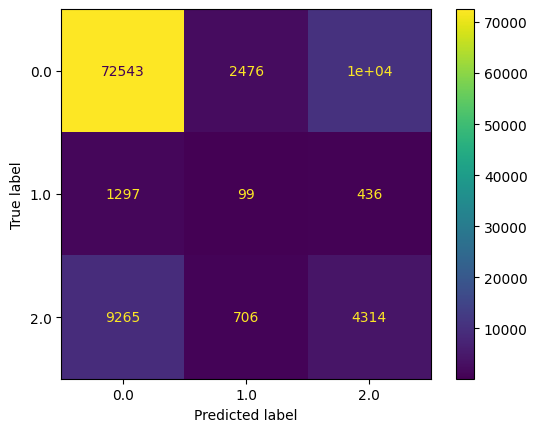

In [17]:
# evaluate the pipeline for knn
%matplotlib inline
pipe_knn.fit(x_train, y_train)
y_pred_knn = pipe_knn.predict(x_test)
print(f'Cross Validation Accuracy: {cross_val_score(pipe_knn, x, y, cv=5, scoring="accuracy").mean()*100}%')
print(f'Metrics Accuracy: {metrics.accuracy_score(y_pred_knn, y_test)*100}%')
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
display.plot()
plt.show()

### Logistic Regression

In [18]:
# making pipeline for logreg
logreg = LogisticRegression(solver='liblinear', C=1)
pipe_logreg = make_pipeline(SMOTE(random_state=14), col_trans, logreg)
pipe_logreg

Pipeline(steps=[('smote', SMOTE(random_state=14)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function cus_trans at 0x14c894fe0>),
                                                  ['Age', 'Income', 'Education',
                                                   'PhysHlth', 'MentHlth',
                                                   'GenHlth']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Age', 'Income', 'Education',
                                                   'PhysHlth', 'MentHlth',
                                                   'GenHlth'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])

In [19]:
# using gridsearchCV to cross validate and find the best tuning parameter for logreg
params_logreg = {}
params_logreg['logisticregression__C'] = [0.1, 1, 10]
grid = GridSearchCV(pipe_logreg, params_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x, y)
grid.best_params_

{'logisticregression__C': 1}

Cross Validation Accuracy Score: 62.31078524124881%
Metrics Accuracy Score: 62.312756228319145%


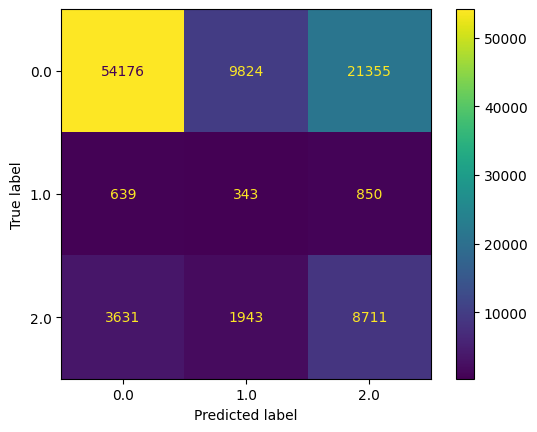

In [20]:
# evaluate the pipeline for logreg
pipe_logreg.fit(x_train, y_train)
y_pred_logreg = pipe_logreg.predict(x_test)
print(f'Cross Validation Accuracy Score: {cross_val_score(pipe_logreg, x, y, cv=5, scoring="accuracy", n_jobs=-1).mean()*100}%')
print(f'Metrics Accuracy Score: {metrics.accuracy_score(y_pred_logreg, y_test)*100}%')
cm = metrics.confusion_matrix(y_test, y_pred_logreg, labels=logreg.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
display.plot()
plt.show()

### Decision Tree Classifier

In [21]:
# making pipeline for dtc
dtc = DecisionTreeClassifier(max_depth=15, min_samples_leaf=5)
pipe_dtc = make_pipeline(SMOTE(random_state=14), col_trans, dtc)
pipe_dtc

Pipeline(steps=[('smote', SMOTE(random_state=14)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function cus_trans at 0x14c894fe0>),
                                                  ['Age', 'Income', 'Education',
                                                   'PhysHlth', 'MentHlth',
                                                   'GenHlth']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Age', 'Income', 'Education',
                                                   'PhysHlth', 'MentHlth',
                                                   'GenHlth'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=5))])

In [22]:
# using gridsearchCV to cross validate and find the best tuning parameter for decision tree classifier
params_dtc = {}
params_dtc['decisiontreeclassifier__max_depth'] = [5, 10, 15]
params_dtc['decisiontreeclassifier__min_samples_leaf'] = [3, 5, 7]
rand = RandomizedSearchCV(pipe_dtc, params_dtc, n_iter=5, cv=5, scoring='accuracy', random_state=0)
rand.fit(x, y)
rand.best_params_

{'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__max_depth': 15}

Cross Validation Accuracy Score: 80.63899400819929%
Metrics Accuracy Score: 80.73163040050457%


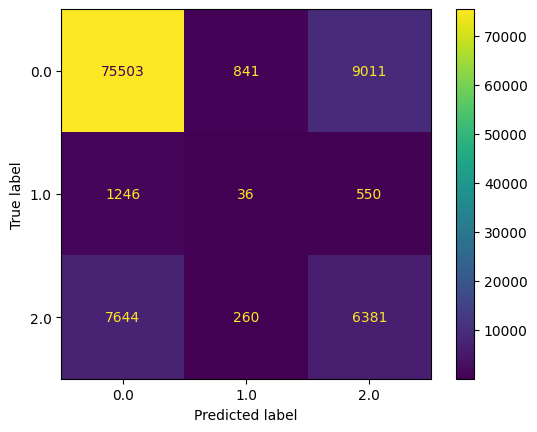

In [23]:
# evaluate the pipeline for dtc
pipe_dtc.fit(x_train, y_train)
y_pred_dtc = pipe_dtc.predict(x_test)
print(f'Cross Validation Accuracy Score: {cross_val_score(pipe_dtc, x, y, cv=5, scoring="accuracy").mean()*100}%')
print(f'Metrics Accuracy Score: {metrics.accuracy_score(y_pred_dtc, y_test)*100}%')
cm = metrics.confusion_matrix(y_test, y_pred_dtc, labels=dtc.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
display.plot()
plt.show()

## Conclusion

***It is directly visible from the above evaluation that the DecisionTreeClassifier is superior in the case.***

@ 2023 Nikolai Peisong Li. All rights reserved.